# Question 4
using Data_2.txt

## Demonstrate POS tagging using NLTK POS tagger, textblob POS tagger and the Regular Expression tagger and report the output.

In [1]:
with open("Data_2.txt", 'r') as f:
    data = f.read()
print(data)

The big black dog barked at the white cat and chased away.


In [2]:
from nltk.tokenize import word_tokenize
words = word_tokenize(data)
print(words)

['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away', '.']


NLTK

In [3]:
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [4]:
from nltk import pos_tag

pos_tag(words)


[('The', 'DT'),
 ('big', 'JJ'),
 ('black', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('white', 'JJ'),
 ('cat', 'NN'),
 ('and', 'CC'),
 ('chased', 'VBD'),
 ('away', 'RB'),
 ('.', '.')]

Textblob

In [5]:
from textblob import TextBlob
b = TextBlob(data)

b.tags

[('The', 'DT'),
 ('big', 'JJ'),
 ('black', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('white', 'JJ'),
 ('cat', 'NN'),
 ('and', 'CC'),
 ('chased', 'VBD'),
 ('away', 'RB')]

RegEx

In [6]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN'),                    # nouns (default)
    (r'^\d+$', 'CD'),
    (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
    (r'.*ment$', 'NN'),               # i.e. wonderment
    (r'.*ful$', 'JJ')                 # i.e. wonderful
]

regexp_tagger = nltk.RegexpTagger(patterns)
tagger = nltk.tag.sequential.RegexpTagger(patterns)

tagger.tag(words)

[('The', 'NN'),
 ('big', 'NN'),
 ('black', 'NN'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'NN'),
 ('the', 'NN'),
 ('white', 'NN'),
 ('cat', 'NN'),
 ('and', 'NN'),
 ('chased', 'VBD'),
 ('away', 'NN'),
 ('.', 'NN')]

## Explain the differences of the POS taggers using the output obtained in the above question.

For NLTK and Textblob, the POS tagging has no difference. It is able to accurately determine the POS of each word.
However for RegEx, as it determines the POS based on the form of the text, the result is nor accurate at all.

## Justify the most suitable POS tagger for text analytics. Support your answer using the output obtained in the task Q4-1

Either NLTK or TextBlob is suitable for text analytics, but RegEx is not as accurate, so it is not suitable. However, TextBlob might be easier to execute as NLTK `pos_tag()` require manual word tokenization, where TextBlob does not.

## Draw possible parse trees for the given sentence using suitable python codes and report the output along with the code.

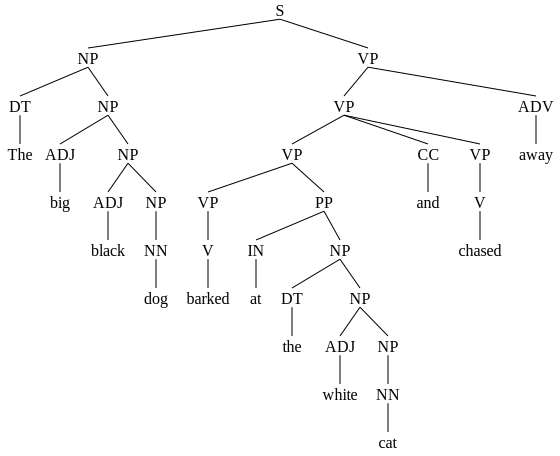

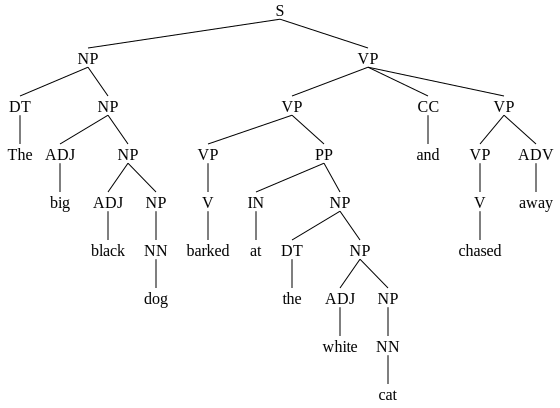

In [7]:
from IPython.display import display
import nltk
grammar = nltk.CFG.fromstring(
    """
    S -> NP VP
    NP -> DT NP | ADJ NP | NN
    VP -> VP NP | VP PP | V | VP ADV | VP CC VP
    PP -> IN NP
    V -> 'barked' | 'chased'
    DT -> 'a' | 'the' | 'The'
    NN -> 'dog' | 'cat'
    CC -> 'and'
    IN -> 'at'
    ADJ -> 'big' | 'black' | 'white'
    ADV -> 'away'
    """
)

parser = nltk.ChartParser(grammar)
for tree in parser.parse(b.words):
    display(tree)